<a href="https://colab.research.google.com/github/yashkathe/Deep-Learning-with-PyTorch/blob/master/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification

Classification is the process of predicting the category to which a given piece of data belongs, based on learned patterns from previous data

## Types of classification:
1. **Binary**   
 Involves two classes; for example, email is either spam or not spam
2. **MultiClass**  
  Involves more than two classes but each instance is assigned to one and only one class; for example, classifying an animal as a cat, dog, or horse
3. **MultiLabel**  
  Each instance can be assigned multiple classes; for example, a movie can be categorized as action, comedy, and drama simultaneously

  <img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/02-different-classification-problems.png" height="450">


## Architecture of Classification Model

| Hyperparameter                | Binary Classification                                                             | Multiclass classification                                         |
|-------------------------------|-----------------------------------------------------------------------------------|-------------------------------------------------------------------|
| Input layer shape (in_features) | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification                                     |
| Hidden layer(s)               | Problem specific, minimum = 1, maximum = unlimited                                | Same as binary classification                                     |
| Neurons per hidden layer      | Problem specific, generally 10 to 512                                             | Same as binary classification                                     |
| Output layer shape (out_features) | 1 (one class or the other)                                                       | 1 per class (e.g. 3 for food, person or dog photo)                 |
| Hidden layer activation       | Usually ReLU (rectified linear unit) but can be many others                       | Same as binary classification                                     |
| Output activation             | Sigmoid (torch.sigmoid in PyTorch)                                                | Softmax (torch.softmax in PyTorch)                                |
| Loss function                 | Binary crossentropy (torch.nn.BCELoss in PyTorch)                                 | Cross entropy (torch.nn.CrossEntropyLoss in PyTorch)               |
| Optimizer                     | SGD (stochastic gradient descent), Adam (see torch.optim for more options)        | Same as binary classification                                     |


## Make classification data

### Generate Random Data

In [128]:
from sklearn.datasets import make_circles

In [129]:
# generate random data
n_samples = 1000

x , y = make_circles(n_samples,
                     noise= 0.05,
                     random_state=42)

We have `2 features of x` which relate to `1 label of y`

In [130]:
# look through the data

print(f"First 5 samples of x {x[:5]}")
print(f"First 5 samples of y {y[:5]}")

First 5 samples of x [[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
First 5 samples of y [1 1 1 1 0]


### Make dataframe of circle data

In [131]:
import pandas as pd

In [132]:
circles = pd.DataFrame({"X1": x[: ,0] ,
                        "X2": x[: ,1],
                        "label": y
                      })

circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


### Visualise the data

In [133]:
import matplotlib.pyplot as plt

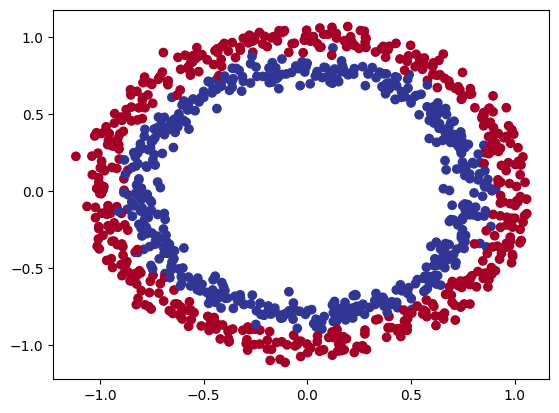

In [134]:
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap=plt.cm.RdYlBu)

### Check input and output shapes

In [135]:
x.shape, y.shape

((1000, 2), (1000,))

In [136]:
# view the first example of features and labels

x_sample = x[0]
y_sample = y[0]

print(f"sample value of x: {x_sample} and sample value of y: {y_sample}")
print(f"shape for x: {x_sample.shape} and shape for y: {y_sample.shape}")

sample value of x: [0.74220688 0.24668576] and sample value of y: 1
shape for x: (2,) and shape for y: ()


### Turn data into tensors

In [137]:
import torch

In [138]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [139]:
x[:5], y[:5], x.dtype, y.dtype

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

### Split data into training and test sets

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
# 20 % data - test || 80 % of data - train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [142]:
print(f"Length of training data: {len(x_train), len(y_train)}, length of testing data: {len(x_test), len(y_test)}")

Length of training data: (800, 800), length of testing data: (200, 200)


## Building a Model

Model to classify blue and red dots

In [143]:
import torch
from torch import nn

In [144]:
# device agnostic code

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Construct a model that subclasses nn.Module

In [145]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # create 2 nn.Linear laters capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features(of x) and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features of previous layer and outputs a single feature (shape of y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

### Instantiate our model

In [146]:
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

### Alternate way to create model using `nn.Sequential()`

This is same as subclassing the nn.Module

`subclassing nn.Module` is useful when you have more complex layers and flow of data is complicated

In [147]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [148]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3948, -0.1807],
                      [-0.4035, -0.2421],
                      [-0.5283,  0.2522],
                      [ 0.5473, -0.6657],
                      [ 0.1642,  0.3653]])),
             ('0.bias', tensor([ 0.1282, -0.2518,  0.3691,  0.3716,  0.2644])),
             ('1.weight',
              tensor([[-0.0786, -0.1184,  0.0478, -0.0790, -0.1333]])),
             ('1.bias', tensor([0.2859]))])

### Making Predictions

In [149]:
with torch.inference_mode():
  untrained_preds = model_0(x_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)}, shape: {x_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFIrst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, shape: torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.3250],
        [0.3093],
        [0.2913],
        [0.3351],
        [0.1839],
        [0.1753],
        [0.2257],
        [0.1951],
        [0.2924],
        [0.3115]])

FIrst 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Setup Loss fuction and Optimizer

- What loss function and optimizer should you use?  
 For `Regression` - we use **MAE** (mean absolute error) or **MSE** (mean squared error)  
 For `Classification` - we use **binary cross entropy** or **categorical cross entropy**  
 For `Optimizers` - we use **SGD** and **Adam**

Loss function which will be used is `torch.nn.BCEWithLogitsLoss()`  
has _sigmoid loss function_ built in

In [150]:
# Setup the loss function

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### Calculate accuracy

Out of 100 examples, what percentage does our model get right?

In [151]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # Counts how many predictions match the true labels and converts the total to a Python number
  acc = (correct/len(y_pred)) * 100
  return acc

## Train the Model

### Going from Raw Logits -> Prediction Probablities -> Prediction Labels

Our model outputs are going to be raw **`logits`**

- In a neural network, logits are the outputs you get just before the final step where the network decides what to predict.   

- These outputs are then typically transformed by **`activation functions`** like `softmax (for multiclass classification)` or `sigmoid (for binary cross entropy)` to turn them into probabilities, which help in making decisions like classifying images or recognizing speech.

- We can convert our model's prediction probablities to **`prediciton labels`** by either `rounding them (for binary classification)` or taking `argmax() (for multiclass classification)`

In [152]:
# View the first 5 outputs of forward pass on the test data

model_0.eval()

with torch.inference_mode():
  y_logits = model_0(x_test.to(device))

y_logits[:5]
# raw output predicition without passing the model to any activatio functions
# raw output going through our two layers the logits are going to be these:

tensor([[0.3250],
        [0.3093],
        [0.2913],
        [0.3351],
        [0.1839]])

In [153]:
# But this is not in the same format as the test data

y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Using Sigmoid Activation Function

Turn model logits to prediction probablities

In [154]:
y_preds_probs = torch.sigmoid(y_logits)

y_preds_probs[:5]

tensor([[0.5805],
        [0.5767],
        [0.5723],
        [0.5830],
        [0.5458]])

round the values to match the y_test output pattern

so 0.5 is our `decision boundary`

- y_preds_probs >= 0.5, y=1 (class 1)
- y_preds_probs  < 0.5, y=0 (class 0)


In [155]:
# Find the predicited labels
y_preds = torch.round(y_preds_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(x_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze())[:5])

#Get rid of extra dimension
y_preds.squeeze()[:5]

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

## Building a Training and Test loop

1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss Backward
5. Optimizer step

In [156]:
device

'cpu'

In [157]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [158]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 101

# put data to target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

# build training and evaluation loop
for epoch in range(epochs):

  ### Turn on Training Mode
  model_0.train()

  # forward pass (logits -> pred probs -> pred labels)
  y_logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # calculate loss and accuracy (or loss function: BCEwithLogitsLoss)
  # BCEwithLogitsLoss expects raw logits as input
  loss = loss_fn(y_logits,
              y_train)

  """
  BCE Loss expects predicition probablities as input
  function would look like this

  loss_fn(torch.sigmoid(y_logits), y_train)
  """

  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward  (backpropogation)
  loss.backward()

  # Optimizer step (gradient descent)
  optimizer.step()

  # Testing the data
  ### Turn on evaluation mode
  model_0.eval()
  with torch.inference_mode():
    # forward pass
    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate test loss
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out what is happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}% ")


Epoch: 0 | Loss: 0.70172 | Accuracy: 50.00% | Test Loss: 0.70202 | Test Accuracy: 50.00% 
Epoch: 10 | Loss: 0.69747 | Accuracy: 50.00% | Test Loss: 0.69788 | Test Accuracy: 50.00% 
Epoch: 20 | Loss: 0.69539 | Accuracy: 50.00% | Test Loss: 0.69583 | Test Accuracy: 50.00% 
Epoch: 30 | Loss: 0.69436 | Accuracy: 52.00% | Test Loss: 0.69480 | Test Accuracy: 51.00% 
Epoch: 40 | Loss: 0.69384 | Accuracy: 56.62% | Test Loss: 0.69428 | Test Accuracy: 54.00% 
Epoch: 50 | Loss: 0.69356 | Accuracy: 52.75% | Test Loss: 0.69400 | Test Accuracy: 52.50% 
Epoch: 60 | Loss: 0.69340 | Accuracy: 52.12% | Test Loss: 0.69385 | Test Accuracy: 54.00% 
Epoch: 70 | Loss: 0.69330 | Accuracy: 51.38% | Test Loss: 0.69377 | Test Accuracy: 52.00% 
Epoch: 80 | Loss: 0.69324 | Accuracy: 51.75% | Test Loss: 0.69373 | Test Accuracy: 53.00% 
Epoch: 90 | Loss: 0.69320 | Accuracy: 51.50% | Test Loss: 0.69371 | Test Accuracy: 53.50% 
Epoch: 100 | Loss: 0.69316 | Accuracy: 51.12% | Test Loss: 0.69371 | Test Accuracy: 52.50% 

## Visualise the predicitons made by our model

According to the loss and accuracy it looks like the model is ot learning anything

To do so we will import a function called `plot_decision_boundary()`

To make predicitons and evaluate the model


In [159]:
import requests
from pathlib import Path

In [160]:
# Download helper function from github repository (raw version)

if Path("helper_functions.py").is_file():
  print("helper function exists already, skipping downloads")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper function exists already, skipping downloads


In [161]:
# Import functions from downloaded file

from helper_functions import plot_predictions, plot_decision_boundary

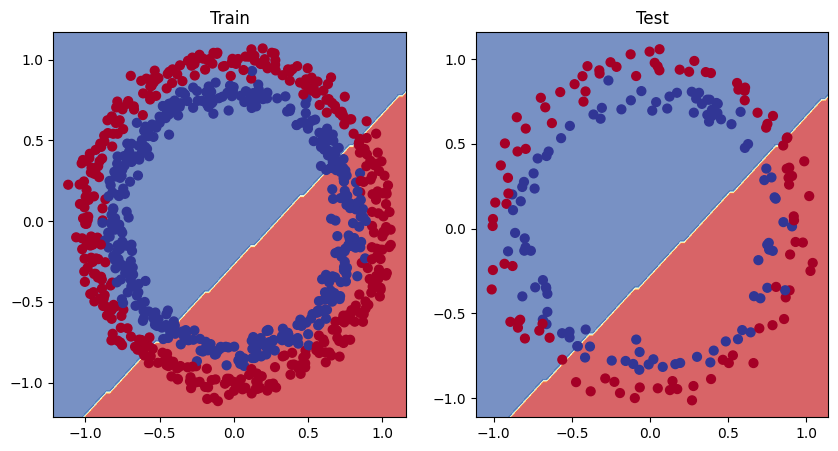

In [162]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_0, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, x_test, y_test)

The observation that can be inferred from this is that: the model is trying to draw a straight line instead of a circular line to seperate the data

## Improving our model (from a model's perspective)

### How can we do that?

- Add more layers: give the model more chances to learn about patterns in the data
- Add more hiddent units - go from 5 hidden units to 10 hidden units
- Fit for longer - increase the number of epochs
- Changing the activation functions
- Change the learning rate
- Change the loss function

These all are model perspective because they **deal directly with the model, rather than the data**  

And because these options are all values we (as engineers) can change, tehy are referred as `hyperparameters`  

`parameters` are numbers within the models - weights and biases  
parameters are updated by the model itself

### Changing Hyperparameters

- Adding more hidden units: 5 -> 10
- Increase the number of layers 2 -> 3
- Increase the number of epochs 100 -> 1000


### Building a new model

In [163]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    """
    There are TWO WAYS to pass data through each layer
    One way to pass data is given below:
    """

    # z = self.layer_1(x)
    # z = self.layer_1(z)
    # z = self.layer_1(z)
    # return z

    """
    Another way to pass data is as follows:
    This method leverages speed ups where its possible behind the scenes
    """

    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

### Create a Loss Function and Optimizer

In [164]:
#loss function
loss_fn = nn.BCEWithLogitsLoss()

#optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Testing and Evaluation Loop

In [165]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs = 1001

# put data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):

  ### Turn on training mode
  model_1.train()

  # Forward Pass
  y_logits = model_1(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probablities -> predicitions

  # calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward (backpropogation)
  loss.backward()

  # Optimizer step (gradient descent)
  optimizer.step()

  #Testing
  ### Turn on evaluation mode
  model_1.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_1(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc= accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

  # Print out what is happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.69393 | Accuracy: 51.00% | Test Loss: 0.69264 | Test Accuracy: 50.00% 
Epoch: 100 | Loss: 0.69305 | Accuracy: 50.50% | Test Loss: 0.69379 | Test Accuracy: 48.00% 
Epoch: 200 | Loss: 0.69299 | Accuracy: 51.12% | Test Loss: 0.69436 | Test Accuracy: 47.00% 
Epoch: 300 | Loss: 0.69298 | Accuracy: 51.00% | Test Loss: 0.69456 | Test Accuracy: 46.00% 
Epoch: 400 | Loss: 0.69298 | Accuracy: 51.38% | Test Loss: 0.69463 | Test Accuracy: 45.50% 
Epoch: 500 | Loss: 0.69298 | Accuracy: 51.62% | Test Loss: 0.69465 | Test Accuracy: 45.50% 
Epoch: 600 | Loss: 0.69298 | Accuracy: 51.62% | Test Loss: 0.69466 | Test Accuracy: 45.50% 
Epoch: 700 | Loss: 0.69298 | Accuracy: 51.62% | Test Loss: 0.69466 | Test Accuracy: 45.50% 
Epoch: 800 | Loss: 0.69298 | Accuracy: 51.62% | Test Loss: 0.69466 | Test Accuracy: 45.50% 
Epoch: 900 | Loss: 0.69298 | Accuracy: 51.62% | Test Loss: 0.69466 | Test Accuracy: 45.50% 
Epoch: 1000 | Loss: 0.69298 | Accuracy: 51.62% | Test Loss: 0.69466 | Test Accurac

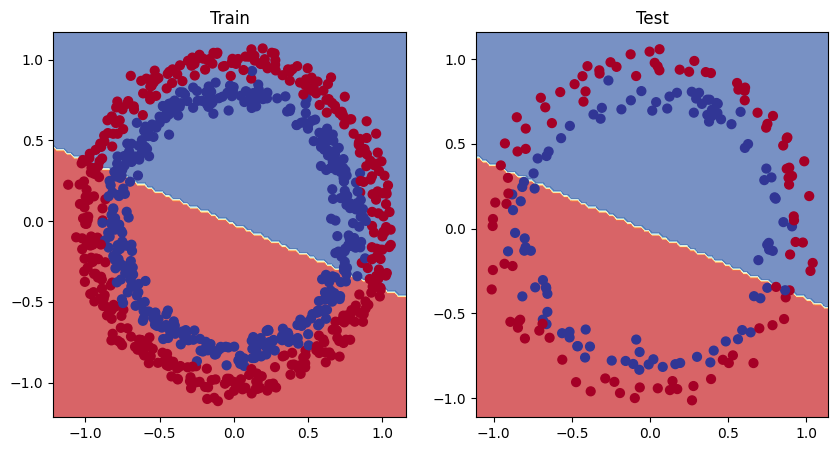

In [166]:
# Plot decision boundary
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_1, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, x_test, y_test)

There is still no improvement according to the plot decision boundary plotted above

## Checking if model atleast works with linear data

One way to troubleshoot a larger problem is to test it out on a smaller problem

### Preparing data to see if model can fit a straight line

In [167]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [168]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))


80 80 20 20


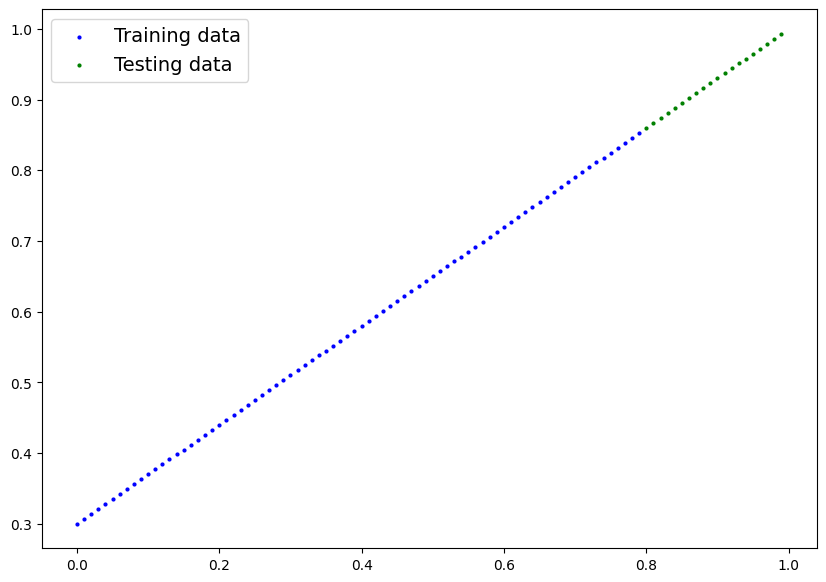

In [169]:
# Plot the training and testing data
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### Adjusting model_1 to straight line

 Recreate model_1 but with a loss function suited to our regression data.

In [170]:
# Same architecture as model_1 (but using nn.Sequential)

model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

### Setting Loss Function and Optimizer

In [171]:
# Loss Function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

### Train the model

In [172]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1001

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what is happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603
Epoch: 1000 | Train loss: 0.06455, Test loss: 0.02425


### Plot Predictions

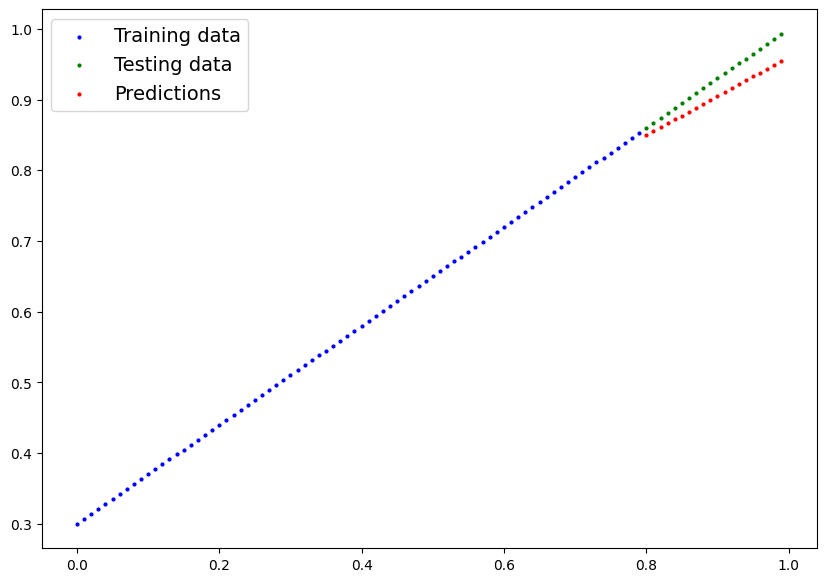

In [173]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## **Non Linearity** - The missing piece

Combining the power of both linear as well as non linear lines

## Recreating Non Linear Data

In [174]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

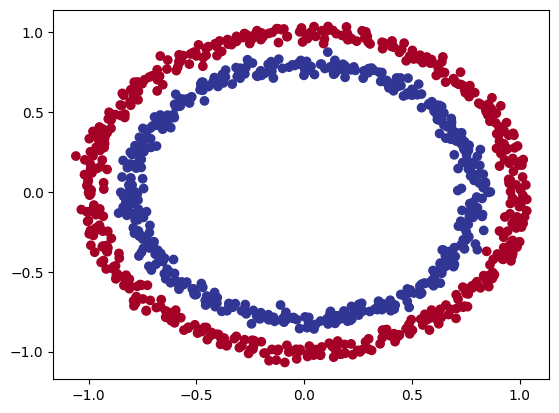

In [175]:
n_samples = 1000

x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

### Convert Data to Tensors

In [176]:
import torch
from sklearn.model_selection import train_test_split

In [177]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

### Split data into train and test sets

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Building a model with non-linearity

Artifical Neural Networks are combination of both linear and non linear functions

`nn.ReLU()` is a function used in neural networks that stands for "Rectified Linear Unit".   

It's a simple operation that replaces all negative values in the input data with zero.   

This function is used to introduce non-linearity to the model, helping it learn more complex patterns in the data.

 <img src="https://www.researchgate.net/publication/346250677/figure/fig2/AS:964989229727745@1607082769699/ReLU-function-graph.png" height="250" alt="ReLU">

In [179]:
# using non linear activation functions to build a model

from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    # layer_1 -> relu -> layer_2 -> relu -> layer_3
    return  self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### Setup Loss function and Optimizer

In [180]:
# loss function
loss_fn = nn.BCEWithLogitsLoss()

# optimizer
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### Training the model with non-linearity

In [181]:
#torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put all data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

In [182]:
# set number of epochs
epochs = 3001

for epoch in range(epochs):

  # Forward pass
  y_logits = model_3(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probablities -> prediction labels

  # Calculate Loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer
  optimizer.zero_grad()

  # Loss Backward
  loss.backward()

  # Step the Optimizer
  optimizer.step()

  # Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what is happening
  if epoch % 300 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.69295 | Accuracy: 50.00% | Test Loss: 0.69319 | Test Accuracy: 50.00% 
Epoch: 300 | Loss: 0.68795 | Accuracy: 53.00% | Test Loss: 0.68723 | Test Accuracy: 56.00% 
Epoch: 600 | Loss: 0.67515 | Accuracy: 54.50% | Test Loss: 0.67285 | Test Accuracy: 56.00% 
Epoch: 900 | Loss: 0.62362 | Accuracy: 74.00% | Test Loss: 0.62145 | Test Accuracy: 79.00% 
Epoch: 1200 | Loss: 0.37056 | Accuracy: 97.75% | Test Loss: 0.40595 | Test Accuracy: 92.00% 
Epoch: 1500 | Loss: 0.12188 | Accuracy: 99.62% | Test Loss: 0.16512 | Test Accuracy: 99.00% 
Epoch: 1800 | Loss: 0.05773 | Accuracy: 99.88% | Test Loss: 0.08672 | Test Accuracy: 99.50% 
Epoch: 2100 | Loss: 0.03628 | Accuracy: 99.88% | Test Loss: 0.05979 | Test Accuracy: 100.00% 
Epoch: 2400 | Loss: 0.02604 | Accuracy: 99.88% | Test Loss: 0.04662 | Test Accuracy: 100.00% 
Epoch: 2700 | Loss: 0.02036 | Accuracy: 99.88% | Test Loss: 0.03864 | Test Accuracy: 100.00% 
Epoch: 3000 | Loss: 0.01672 | Accuracy: 99.88% | Test Loss: 0.03363 | Tes

### Evaluating a model trained with non linear activation functions

In [185]:
# Make prediction

model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

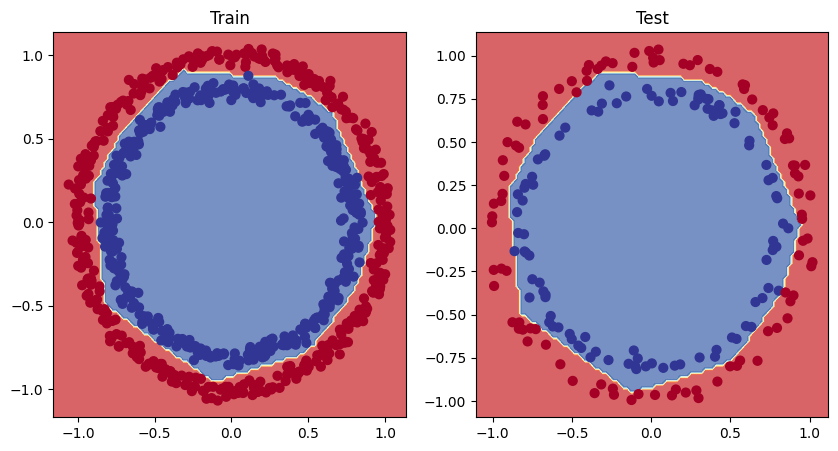

In [186]:
# Plot decision boundary
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_3, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)